In [13]:
#import
import pandas as pd
import numpy as np
import scipy as sc
import os

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import dummy
from IPython.display import Image
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [15]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install mglearn

    100% |████████████████████████████████| 542kB 1.8MB/s 
  Running setup.py bdist_wheel for mglearn ... - \ done
  Stored in directory: /Users/Paolo/Library/Caches/pip/wheels/79/8b/2b/17dcfb9c9b044b216a58daea9787a0637cb1ffc5b4c2a78e50
Successfully built mglearn


In [16]:
import mglearn 

X.shape: (26, 2)


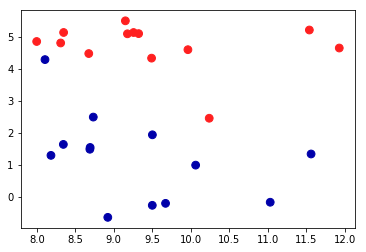

In [17]:
X, y = mglearn.datasets.make_forge()
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
print("X.shape: %s" % (X.shape,))

In [19]:
X.shape

(26, 2)

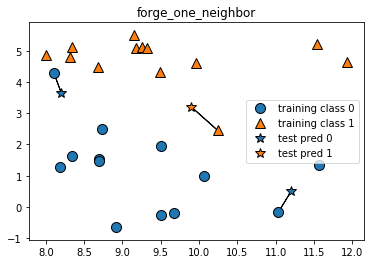

In [20]:
#classification
mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.title("forge_one_neighbor");

In [22]:
#split
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)


In [24]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [25]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [26]:
clf.score(X_test, y_test)

0.8571428571428571

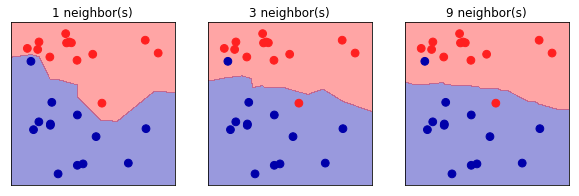

In [30]:
#decision boundary
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
    ax.set_title("%d neighbor(s)" % n_neighbors)

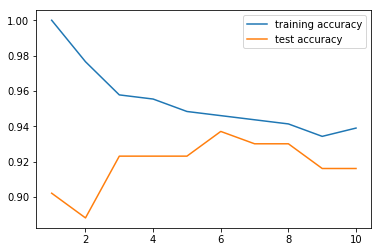

In [32]:
#cancer breast dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10.
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.legend()

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

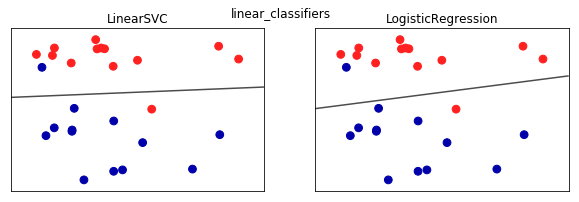

In [35]:
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
plt.suptitle("linear_classifiers")

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
        clf = model.fit(X, y)
        mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
        ax.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
        ax.set_title("%s" % clf.__class__.__name__)

In [37]:
#split
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [40]:
from sklearn.svm import SVC


In [41]:
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
print("accuracy on training set: %f" % svc.score(X_train, y_train))
print("accuracy on test set: %f" % svc.score(X_test, y_test))


accuracy on training set: 0.947368
accuracy on test set: 0.857143


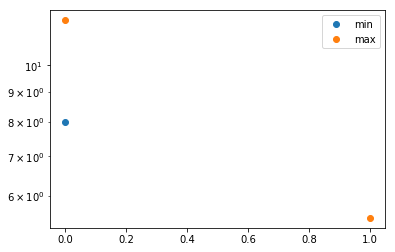

In [43]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), 'o', label="max")
plt.legend(loc="best")
plt.yscale("log")

In [44]:
#rescale the data points
# Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
    # Compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)


In [45]:
 # subtract the min, divide by range
    # afterwards min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n%s" % X_train_scaled.min(axis=0))
print("Maximum for each feature\n %s" % X_train_scaled.max(axis=0))


Minimum for each feature
[ 0.  0.]
Maximum for each feature
 [ 1.  1.]


In [46]:
 # use THE SAME transformation on the test set,
    # using min and range of the training set. See Chapter 3 (unsupervised learning) for details.
X_test_scaled = (X_test - min_on_training) / range_on_training
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("accuracy on training set: %f" % svc.score(X_train_scaled, y_train))
print("accuracy on test set: %f" % svc.score(X_test_scaled, y_test))


accuracy on training set: 0.947368
accuracy on test set: 0.857143
